In [8]:
import pandas as pd
import conexion_bd
import funciones
import matplotlib.pyplot as plt

In [30]:
def crear_secuencia_colores(colores, repeticiones):
  """Crea una secuencia de colores repitiendo cada color el número especificado de veces.

  Args:
    colores: Una secuencia de colores.
    repeticiones: El número de veces que se repite cada color.

  Returns:
    Una secuencia de colores con el tamaño especificado.
  """

  secuencia_colores = []
  for color in colores:
    for i in range(repeticiones):
      secuencia_colores.append(color)
  return secuencia_colores


vamos calcular el KPI propuesto en las consignas, que nos pide lo siguiente: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia

Para calcular necesitamos aplicar la siguiente formula: KPI = ((Nuevo acceso - Acceso actual) / Acceso actual) * 100

Donde:

Nuevo acceso: número de hogares con acceso a Internet después del próximo trimestre.
Acceso actual: número de hogares con acceso a Internet en el trimestre actual.



In [76]:
# Leemos la tabla acceso_inter_provincia desde nuestra base de datos
df_acceso_inter_provincia = pd.read_sql("SELECT * FROM acceso_inter_provincia", conexion_bd.conexion)
df_acceso_inter_provincia.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12232\2583645592.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_acceso_inter_provincia = pd.read_sql("SELECT * FROM acceso_inter_provincia", conexion_bd.conexion)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,Acceso_pro_id
0,2022,4,Buenos Aires,5,6,5,0
1,2022,4,Capital Federal,2,2,2,1
2,2022,4,Catamarca,71,1,71,2
3,2022,4,Chaco,144,5,144,3
4,2022,4,Chubut,168,904,169,4


C:\Users\Dell\AppData\Local\Temp\ipykernel_12232\2089031822.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_acceso_inter_provincia["Provincia"], rotation=90, ha="right")


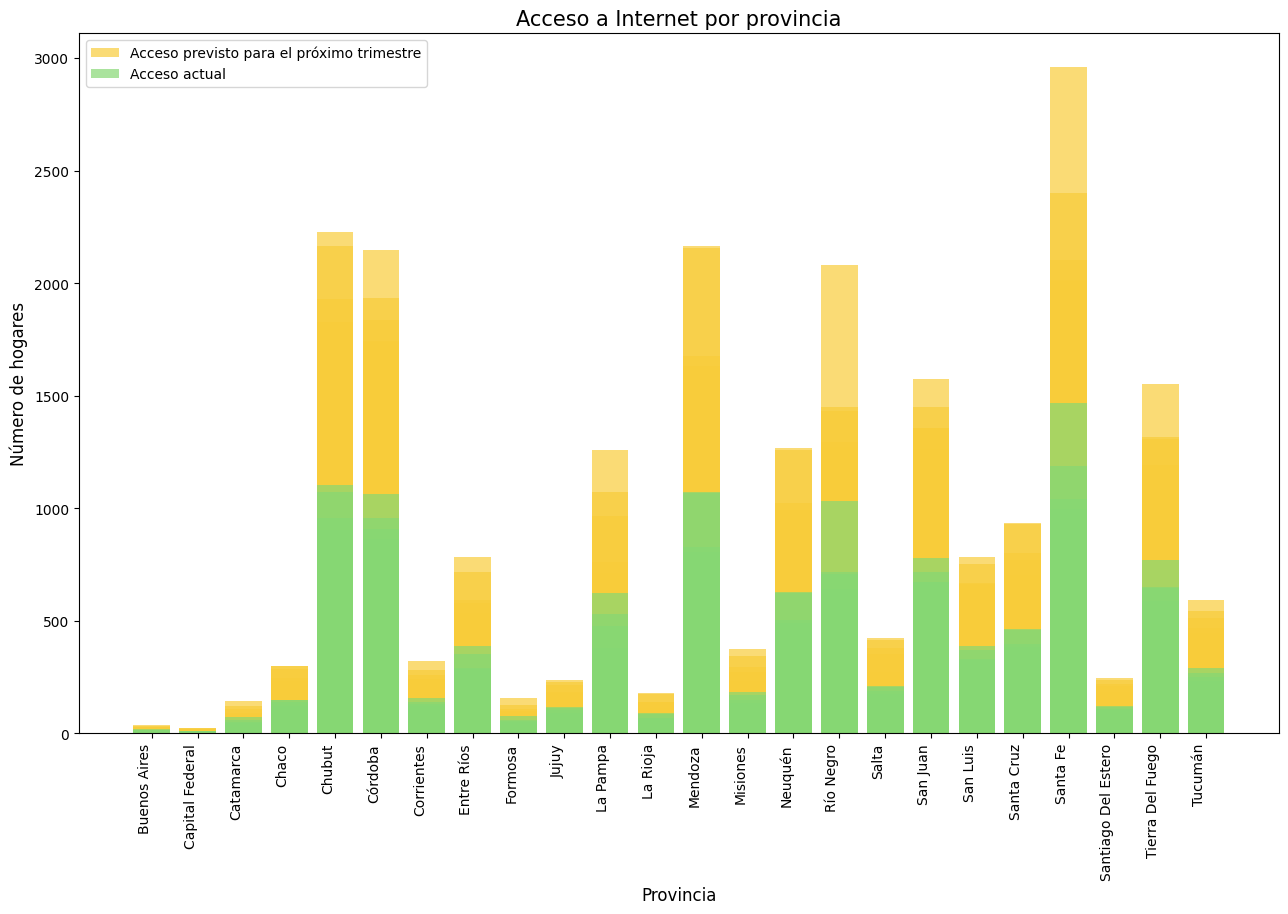

In [93]:
# Calculamos el acceso actual
df_acceso_inter_provincia["Acceso actual"] = df_acceso_inter_provincia["Banda ancha fija"] + df_acceso_inter_provincia["Dial up"]

# Agregamos una columna con el número de hogares con acceso a Internet en el próximo trimestre
df_acceso_inter_provincia["Nuevo acceso"] = df_acceso_inter_provincia["Acceso actual"] * (1 + 0.02)

# Agregamos una columna con el número de hogares con acceso a Internet en el próximo trimestre
df_acceso_inter_provincia["Total próximo trimestre"] = df_acceso_inter_provincia["Nuevo acceso"] + df_acceso_inter_provincia["Acceso actual"]

# Calculamos el crecimiento
df_acceso_inter_provincia["Crecimiento"] = (df_acceso_inter_provincia["Total próximo trimestre"] - df_acceso_inter_provincia["Acceso actual"]) / df_acceso_inter_provincia["Acceso actual"]
# Filtramos el dataset para mostrar solo el trimestre actual y el próximo
df_acceso_inter_provincia = df_acceso_inter_provincia[df_acceso_inter_provincia["Trimestre"] == 4]

# Creamos un gráfico de barras que muestre el número de hogares con acceso a Internet por provincia
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

# Establecemos la posición de las etiquetas del eje x
ax.set_xticklabels(df_acceso_inter_provincia["Provincia"], rotation=90, ha="right")

# Ajustamos el espacio entre los ejes x y y
plt.subplots_adjust(bottom=0.15, top=0.85, left=0.15, right=0.95)

# Agregamos transparencia a los colores
ax.bar(df_acceso_inter_provincia["Provincia"], df_acceso_inter_provincia["Total próximo trimestre"], color="#F8CC3A", alpha=0.7)
ax.bar(df_acceso_inter_provincia["Provincia"], df_acceso_inter_provincia["Acceso actual"], color="#86D874", alpha=0.7)

# Agregamos la leyenda
ax.legend(["Acceso previsto para el próximo trimestre", "Acceso actual"], loc="upper left", fontsize=10)

# Agregamos un título para el gráfico
ax.set_title("Acceso a Internet por provincia", fontsize=15)

# Agregamos etiquetas para los ejes
ax.set_xlabel("Provincia", fontsize=12)
ax.set_ylabel("Número de hogares", fontsize=12)

# Mostramos el gráfico
plt.show()

El grafico muestra que el acceso a Internet ha aumentado en todas las provincias de Argentina. Este aumento es significativo, ya que representa un crecimiento del 2% en el acceso a Internet para cada 100 hogares.

In [94]:
df_acceso_inter_provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,Acceso_pro_id,Acceso actual,Nuevo acceso,Total próximo trimestre,Crecimiento
0,2022,4,Buenos Aires,5,6,5,0,11,11.22,22.22,1.02
1,2022,4,Capital Federal,2,2,2,1,4,4.08,8.08,1.02
2,2022,4,Catamarca,71,1,71,2,72,73.44,145.44,1.02
3,2022,4,Chaco,144,5,144,3,149,151.98,300.98,1.02
4,2022,4,Chubut,168,904,169,4,1072,1093.44,2165.44,1.02
...,...,...,...,...,...,...,...,...,...,...,...
787,2014,4,Santa Cruz,25,436,26,787,461,470.22,931.22,1.02
788,2014,4,Santa Fe,528,938,529,788,1466,1495.32,2961.32,1.02
789,2014,4,Santiago Del Estero,39,9,39,789,48,48.96,96.96,1.02
790,2014,4,Tierra Del Fuego,28,741,29,790,769,784.38,1553.38,1.02


Podemos observar que la provinci de Santa Fe seria la que posee una mayor crecimiento en el acceso a internet por cada 100 hogares

In [96]:
# Corroboramos el valor maximo en cuanto al total proximo trimestre
max = df_acceso_inter_provincia["Total próximo trimestre"].max()
max = round(max, 3)
max

2961.32

In [97]:
# Cambiamos el nombre de la columna Acces_pro_id para evitar confuciones
df_acceso_inter_provincia = df_acceso_inter_provincia.rename(columns={"Acceso_pro_id": "Acceso_kpi_id"})

Procedemos a guardar el archivo ya procesado para el KPI

In [99]:
df_acceso_inter_provincia.to_parquet("../Data/KPI/Acceso_inter_provin_kpi-parquet")

Cargamos el archivo a nuestra base dedatos

In [100]:
df_acceso_inter_provincia.to_sql("Acceso_kpi", con=conexion_bd.engine, index= False, if_exists="append")

C:\Users\Dell\AppData\Local\Temp\ipykernel_12232\715767216.py:1: UserWarning: The provided table name 'Acceso_kpi' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df_acceso_inter_provincia.to_sql("Acceso_kpi", con=conexion_bd.engine, index= False, if_exists="append")


216